# Multinomial Logistic Regression from Scratch

- Fundamental of all deep learning operations, concerning classification
- Multinomial - used multinomial distributions to derive the likelihood.....
              - multiclass version of logistic regression

In [6]:
np.exp(9)

#e^9

8103.083927575384

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, k); theta/w/weights.shape = (n, k)`
    
    What is $g(x)$ input and output?

    input  = X:    (m, n)
    output = yhat: (m, k) 

    Mathematially, $g(x)$ is an adapted version of the sigmoid formula, so that it outputs (m, k).  We called this $g(x)$ the **softmax** function.

    $$ h = P(y = c | \theta) = \frac{e^{\mathbf{X}\theta_c}}{\sum_{i=1}^k e^{\mathbf{X}\theta_i}}$$

    Division makes sure the probability sums to 1.

    Why $e$?
    - $e$ always give positive number, so it's a perfect guy to calculate probability!
    - But hey, chaky, $e$ to the power of something gives me some number, like very high number, like 8103...., so how it can be probability? 
      - Ans: very simple, just divide by all e, then they will be frac of 1
    - Derivative of e cancels nicely with log
    
    Why is called softmax?
    - what is hardmax ==> [2, 3, 4] ==> [0, 0, 1] 
      - The y vector has only probability of either 1 or 0
    - softmax: ==> [2, 3, 4] ==> [0.05, 0.15, 0.8]


    

2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        
        Note: 
        - if y = [0, 0, 1, 0], and yhat = [0.1, 0.1, 0.7, 0.1], then J must be low
          - y * h = [0, 0, 0.7, 0]
        - if y = [0, 0, 1, 0], and yhat = [0.9, 0.03, 0.03, 0.04], then J must be high
          - y * h = [0, 0, 0.03, 0]

    $$J = -\sum_{i=1}^m \mathbf{Y}^{(i)} * \log{\mathbf{H}}^{(i)}$$
             

    2.2 $$\frac{\partial J}{\partial \theta_j} = \mathbf{X}^\top (\mathbf{H} - \mathbf{Y})$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)

### Let's code

In [1]:
import numpy as np
X = np.array([[1, 3, 8], [4, 8, 1]]) #X with two samples, and three features
X.shape  #(m, n)

(2, 3)

In [5]:
#initial y = [2, 3]  #k = 3, which i have 3 classes, 1, 2, 3
#BUT in ML/DL, we DON'T DEFINE y LIKE THIS
#We define as a one-hot encoded vectors

#for the first sample, the probability of being class 1 = 0; class 2 = 1; class 3 = 0
y = np.array([ [0, 1, 0] , [0, 0, 1]  ])
y.shape #(m, k) where k is number of classes

#with this format, you can get probability of each class, not absolutely the class 
#which is silly....because every prediction is probabilistic....

#i also want to let you know how yhat typically looks like
#the behavior is the the probability sums to 1
#the probability of class 1 is 0.05, class 2 is 0.86, class 3 is 0.09
yhat_example = np.array([  [0.05, 0.86, 0.09 ], [0.3, 0.3, 0.4]   ])
yhat_example.shape #(m, k)

#during like real prediction, we take the index with the highest probability
#this is what i want - [2, 3]
#so how to convert yhat_example to [2, 3]; Ans: use argmax
np.argmax(yhat_example, axis=1) #since the index starts at 0
#so here, let's assume the class is 0, 1, 2

array([1, 2])

In [3]:
'''
X: (m, n)
w/theta/weight: (?, ?)
y: (m, k)

(m, n) @ (n, k) = (m, k)
'''
# w = np.ones((X.shape[1], len(y.unique())))
#assuming my y is not yet one-hot encoded....

91

$$ h = P(y = c | \theta) = \frac{e^{\mathbf{X}\theta_c}}{\sum_{i=1}^k e^{\mathbf{X}\theta_i}}$$

In [7]:
X

array([[1, 3, 8],
       [4, 8, 1]])

In [11]:
theta = np.arange(9).reshape((X.shape[1], 3))
theta

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [31]:
#so please write the softmax function,
#can calculate the yhat with the given theta
def softmax(input):
    return np.exp(input) / np.sum(np.exp(input), axis=1, keepdims=True)

yhat = softmax(X @ theta)
sum  = yhat.sum(axis = 1)

assert np.all(sum == 1)
assert yhat.shape == (X.shape[0], 3)

[False False]


$$J = -\sum_{i=1}^m \mathbf{y}^{(i)} * \log{\mathbf{h}}^{(i)}$$

In [40]:
#1. Implement this loss function - cross entropy
def ce(Y, H):
    return -np.sum(Y * np.log(H)) #because this should give me one number, because J is a number

#2. Create a y, a good yhat, a bad yhat
Y      = np.array([ [0, 0, 1, 0] ])  #(1, k)
good_Y = np.array([ [0.04, 0.03, 0.9, 0.03] ]) 
bad_Y  = np.array([ [0.3,  0.3,  0.1, 0.3 ] ]) 

#3. And check the loss.  The good yhat should have low loss, and bad yhat should have high loss
print("Good: ", ce(Y, good_Y))
print("Bad: ",  ce(Y, bad_Y))

#4. Optional: try to understand what does `-log` do to h


Good:  0.10536051565782628
Bad:  2.3025850929940455


Text(0, 0.5, 'loss')

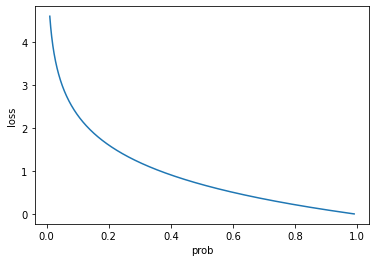

In [45]:
import matplotlib.pyplot as plt

h = np.linspace(0.01, 0.99, 1000)
plt.plot(h, -np.log(h))
plt.xlabel("prob")
plt.ylabel("loss")

#three purposes of log

#1. by doing this, you will notice one thing:
#small probability will be kept small
#only the very big probabiliy will be enlarged
#Recall the definition of softmax

#2. it keeps small probability in check
    #i.e., no errors like 0.00000000000001 == 0
    #by doing np.log, this value is kept

#3. log deals very nicely with e, they cancel one another
    #the magic happens when we find the gradient

In [34]:
np.log(0.9)

-0.10536051565782628

# Let's code multinomial logistic regression

In [ ]:
from sklearn.datasets import load_iris
#1. load sklearn iris dataset
X, y = load_iris(return_X_y=True)

#1.1 optionally, act like you do some EDA with plotting

#2. perform split, standardization, whatever you call

#hint: check how your y looks like
#2.1 convert your y to one-hot encoded y

#3. implement class MultinomialLogisticRegression with fit() and predict()

#4. test with test set, and print sklearn.metrics classification reports, as well sklearn.metrics confusion matrix
    #use argmax, because your test set is NOT one-hot encoded....
    
    
    